In [9]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
#Reading the dataset
data = pd.read_csv('VNL2023.csv')

In [11]:
#Viewing the first few records
data.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [12]:
#Checking the count of records and features
data.shape

(131, 10)

In [13]:
#Summary statistics
data.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [14]:
#Checking for nulls
data.isnull().sum()

,0
Player,0
Country,0
Age,0
Attack,0
Block,0
Serve,0
Set,0
Dig,0
Receive,0
Position,0


In [15]:
#Checking for duplicates
data.duplicated().sum()

0

In [16]:
#Correlation for numeric columns

numeric_cols = data.select_dtypes(include = ['int', 'float']).columns #fetches the numeric datatype features
corr_matrix = data[numeric_cols].corr()
print(corr_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


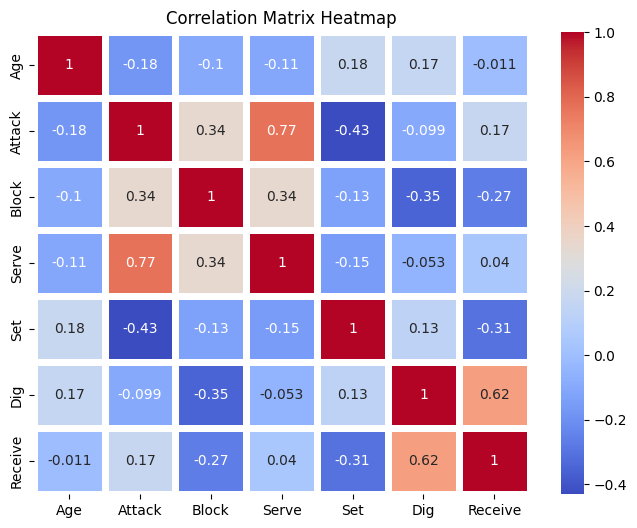

In [23]:
#visualizing the heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
#Position valuecounts
pos_counts = data['Position'].value_counts()

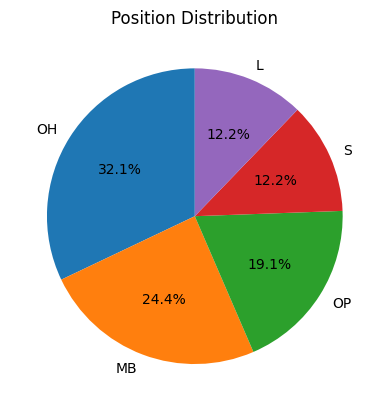

In [30]:
#Visualizing the position counts
plt.pie(pos_counts, labels = pos_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Position Distribution')
plt.show()

In [31]:
data.columns

Index(['Player', 'Country', 'Age', 'Attack', 'Block', 'Serve', 'Set', 'Dig',
       'Receive', 'Position'],
      dtype='object')

In [36]:
# Avergae attack by country
avg_attack_by_country = data.groupby('Country')['Attack'].mean()
avg_attack_by_country.sort_values(ascending = False)

,Attack
Country,
France,6.670000
Japan,6.595000
Cuba,6.344286
Serbia,5.998750
Italy,5.965000
Slovenia,5.961250
Argentina,5.925000
Nederland,5.880000
Poland,5.807000


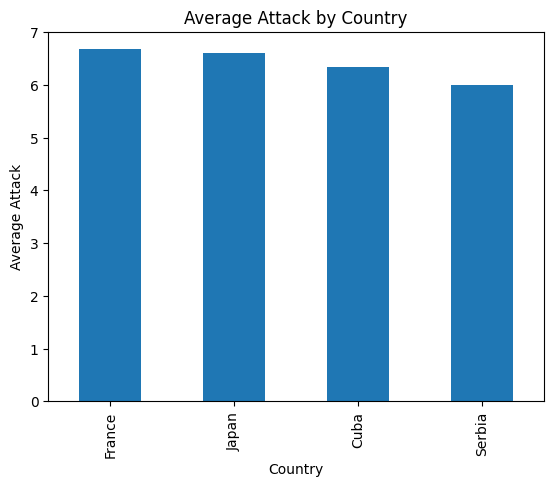

In [41]:
avg_attack_by_country.sort_values(ascending = False).head(4).plot(kind = 'bar')
plt.title('Average Attack by Country')
plt.xlabel('Country')
plt.ylabel('Average Attack')
plt.show()

In [43]:
#Average serve by age
avg_serve_by_age = data.groupby('Age')['Serve'].mean()
avg_serve_by_age.sort_values(ascending = False)

,Serve
Age,
31,0.910000
20,0.880000
21,0.770000
26,0.681053
28,0.667273
35,0.666667
27,0.662500
36,0.660000
24,0.640667


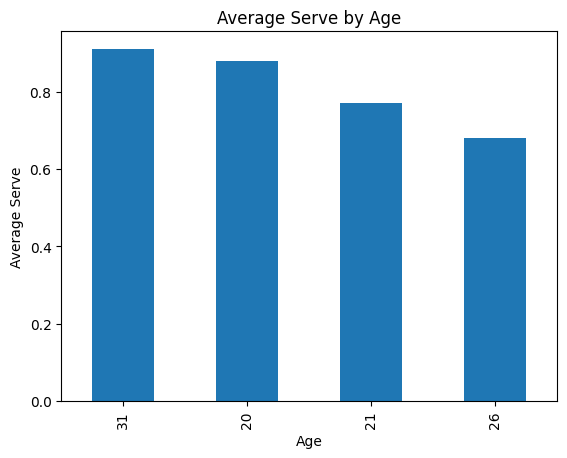

In [44]:
avg_serve_by_age.sort_values(ascending = False).head(4).plot(kind = 'bar')
plt.title('Average Serve by Age')
plt.xlabel('Age')
plt.ylabel('Average Serve')
plt.show()

In [48]:
# Maximum attack by country and position
data.groupby(['Country', 'Position'])['Attack'].max().reset_index().head(20).sort_values(by = 'Attack', ascending = False)

,Country,Position,Attack
12,Bulgaria,OH,14.25
8,Brazil,OP,12.46
7,Brazil,OH,11.85
2,Argentina,OH,11.62
17,Canada,OH,9.75
18,Canada,OP,9.50
3,Argentina,OP,9.15
1,Argentina,MB,7.92
13,Bulgaria,OP,5.75
16,Canada,MB,4.75


In [50]:
#Total digs per country
data.groupby('Country')['Dig'].sum().sort_values(ascending = False)

,Dig
Country,
France,38.59
Italy,35.89
Argentina,33.88
Slovenia,33.85
Poland,32.56
Japan,32.38
Serbia,30.64
USA,28.42
Canada,26.50


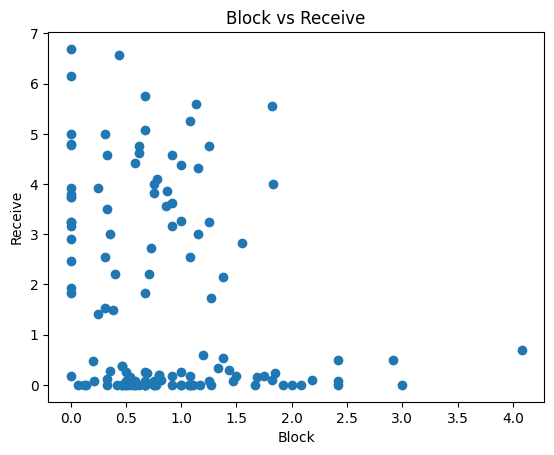

In [51]:
#Blocks Vs Receive
plt.scatter(data['Block'], data['Receive'])
plt.xlabel('Block')
plt.ylabel('Receive')
plt.title('Block vs Receive')
plt.show()

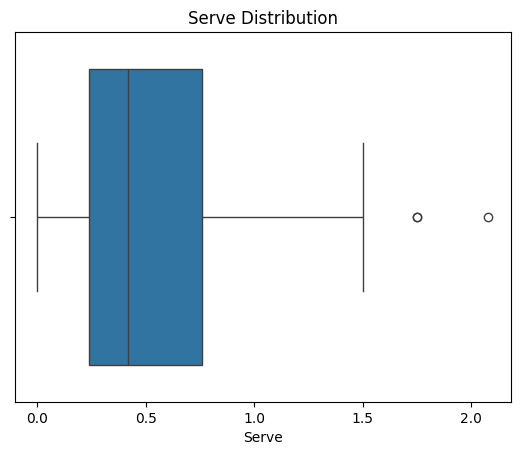

In [54]:
#Analyzing the distribution of Serve
sns.boxplot(x=data['Serve'])
plt.title('Serve Distribution')
plt.xlabel('Serve')
plt.show()

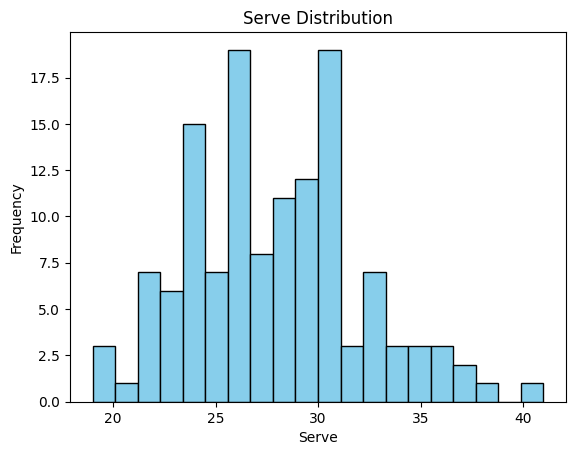

In [55]:
#Analyzing the distribution of Age
plt.hist(data['Age'], bins=20, color = 'skyblue', edgecolor = 'black')
plt.title('Serve Distribution')
plt.xlabel('Serve')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Average Attack')

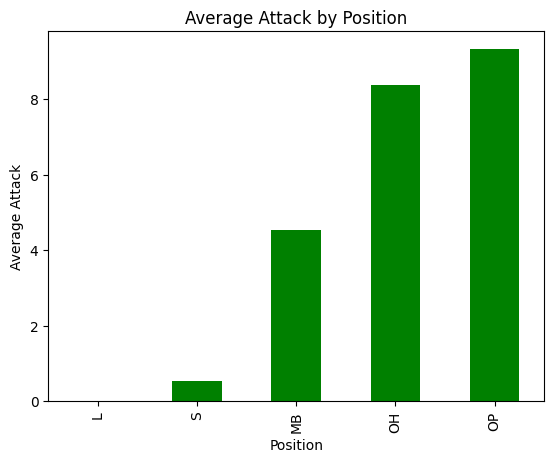

In [58]:
#Average attack by position
avg_attack_by_position = data.groupby('Position')['Attack'].mean().sort_values(ascending = True)
avg_attack_by_position.plot(kind = 'bar', color = 'green')
plt.title('Average Attack by Position')
plt.xlabel('Position')
plt.ylabel('Average Attack')

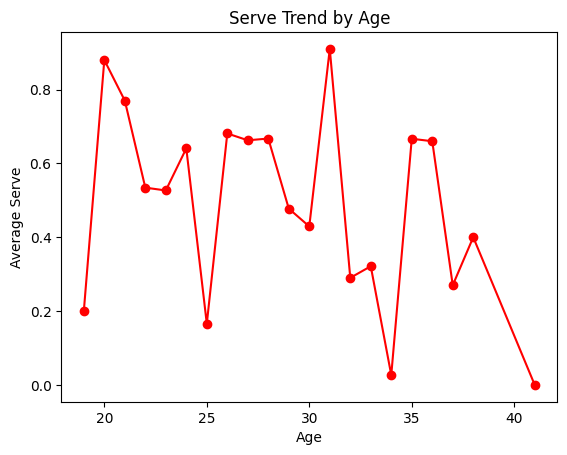

In [60]:
#Serve trend by Age
serve_trend_by_age = data.groupby('Age')['Serve'].mean()
serve_trend_by_age.plot(kind = 'line', color = 'red', marker ='o', linestyle = '-')
plt.title('Serve Trend by Age')
plt.xlabel('Age')
plt.ylabel('Average Serve')
plt.show()

In [62]:
#Total Attacks per country
total_attack_by_country = data.groupby('Country')[['Attack', 'Block']].sum()

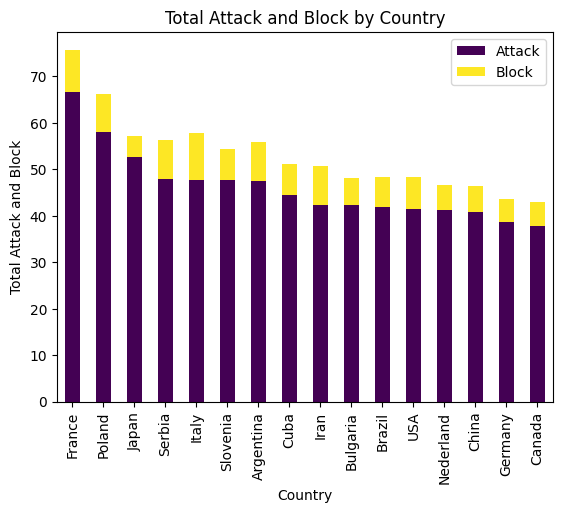

In [68]:
total_attack_by_country.sort_values(ascending = False, by='Attack').plot(kind = 'bar', stacked = True, colormap = 'viridis')
plt.title('Total Attack and Block by Country')
plt.xlabel('Country')
plt.ylabel('Total Attack and Block')
plt.show()